A simple tutorial for doing a Monte Carlo simulation using Python 3.0

From geometry, we know that the ratio of an circle inscribed in a square to that square is pi/4. For our Monte Carlo simulation, we will generate a bunch of points in a square and determine which ones are in the circle and which are not. The ratio of the points inside the circle to the total number of points is pi/4.

First import some libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

Next, we are going to set up a function in Python to:
0. Draw a square and a circle
1. Generate points within a square.
2. Determine which points are also in the circle
3. Plot the points to visualize those points
4. Plot the estimate for pi versus the iteration number to see how quickly we converge on the true value.

#### Drawing a square and a circle

We want our square within a 2x2 grid centered at the origin. The corners of the square will be at (1,1), (-1,1), (1,-1), (-1,-1). The circle will be a unit circle with radius of 1.

For the square, we can generate a list for X and Y values using the corner points.

The circle we can generate using the knowledge of trigonometry. The X value of a particular point will be cosine of the angle, and the Y value will be its sine. The total angle of circle is 2pi radians, and a for loop will allow a quick caculation of the X and Y values of the circle ever degree.

#### Generating points in the square

Numpy's random() function will generate a uniform random number between 0 and 1. We want a number between -1 and 1, so we must first transform it. Subtracting 0.5 from random() gives a value between -0.5 and 0.5 and multiplying that by 2 give a number between -1 and 1. We will do this twice. Once for X and once for Y. 

Pythagoras tells us the distance from origin (r) of our randomly generated points is the square root of the sum of their squares. If this r value is less than or equal to 1, it is within the circle, otherwise it is not. 

Once we're done iterating, we can calculate the final value of pi, and its error versus the true value.

#### Drawing the plots

We want two plots, one is the points with relation to the square and circle, the other the estimate of pi over a number of iteration.

In [16]:
def MonteCarloPi(numDataPoints):
    #Draw a square and circle fo frame out simulation
    squareX = [1,-1,-1,1,1]
    squareY = [1,1,-1,-1,1]
    circleX, circleY = [],[]
    
    for i in range(361):
        circleX.append(np.cos(np.pi*i/180))
        circleY.append(np.sin(np.pi*i/180))
        
    #Generate a bunch of values of x and y between -1 and 1, then assess their combined radius on plane
    myMonteCarloDF = pd.DataFrame(columns=["x","y","r", "r<=1?", "CurrentPi"])
    myMonteCarloDF["x"] = 2*(np.random.rand(numDataPoints)-0.5)
    myMonteCarloDF["y"] = 2*(np.random.rand(numDataPoints)-0.5)
    myMonteCarloDF["r"] = np.sqrt(myMonteCarloDF["x"]**2+myMonteCarloDF["y"]**2)
    myMonteCarloDF.loc[myMonteCarloDF["r"]<=1, "r<=1?"] = 1 #inside the circle
    myMonteCarloDF.loc[myMonteCarloDF["r"]>1, "r<=1?"] = 0 #outside the circle
    myMonteCarloDF["CurrentPi"] = 4*myMonteCarloDF["r<=1?"].cumsum()/(myMonteCarloDF.index-1)
    
    InsidePoints = myMonteCarloDF.loc[myMonteCarloDF["r<=1?"]==1]
    OutsidePoints = myMonteCarloDF.loc[myMonteCarloDF["r<=1?"]==0]
    
    piValue = np.array(myMonteCarloDF["CurrentPi"])[-1]
    piError = round(100*((piValue-np.pi)/np.pi),4)
    
    #Draw a 2D plot of where our iterations landed compared to the square and circle
    rcParams["figure.figsize"] = 5,5
    plt.plot(squareX, squareY,color ="#000000")
    plt.plot(circleX, circleY, color = "#0000CC")
    plt.scatter(InsidePoints["x"],InsidePoints["y"], color ="#00cc00", marker = ".")
    plt.scatter(OutsidePoints["x"], OutsidePoints["y"], color = "#cc0000", marker = ".")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    
    #Draw a psuedo-time series plot of current estimate of pi vs. iteration number
    plt.plot(myMonteCarloDF.index, myMonteCarloDF["CurrentPi"],color ="#009900")
    plt.axhline(y=np.pi, color = "#0F0F0F", ls="--")
    plt.axis([0, numDataPoints,0,4.1])
    plt.xlabel("Iteration Number")
    plt.ylabel("Estimate for pi")
    plt.show()
    
    #Print out our final estimate and how it compares to the true value
    print("\n" + f'Pi is approximately {piValue}\n')
    print(f'This is {piError}% off the true value.\n')

Code is completed, we can run the function for a desired number of iterations. The more interations run, the better the estimate. Here's how it looks with 500 and 50,000 iterations.

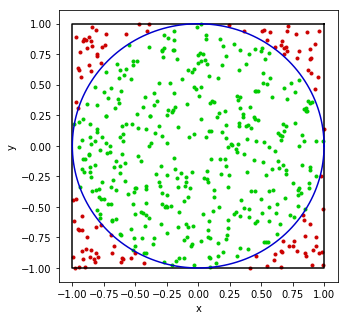

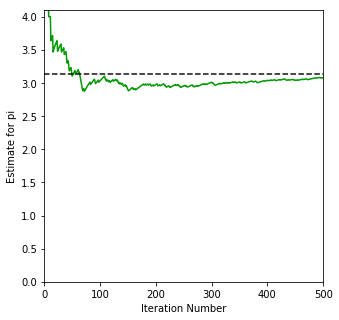


Pi is approximately 3.076305220883534

This is -2.0782% off the true value.



In [18]:
MonteCarloPi(500)

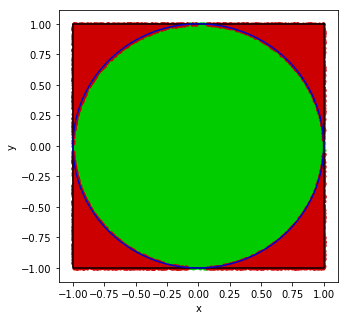

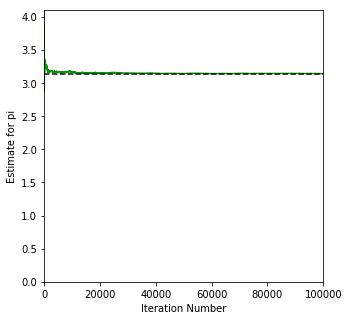


Pi is approximately 3.140502810056201

This is -0.0347% off the true value.



In [20]:
MonteCarloPi(100000)